

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
import pandas as pd
df = pd.read_csv('adult.data', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True, header=None)
df['sex'].count()

32561

### Вопрос 2
Каков средний возраст мужчин?


In [5]:
df.groupby([df['sex'] == 'Male'])['age'].mean()

sex
False    36.858230
True     39.433547
Name: age, dtype: float64

### Вопрос 3
Какова доля граждан США?

In [6]:
df['native-country'].str.contains('United-States').mean()

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

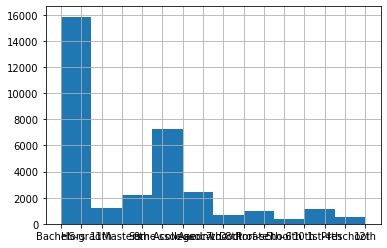

In [9]:
df.education.hist(bins = 10)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [12]:
df.groupby([df['marital-status'] == 'Divorced'])['fnlwgt'].mean().values[1]

185802.79045689848

In [13]:
df.groupby([df['marital-status'] == 'Divorced'])['fnlwgt'].std().values[1]

105646.78945933616

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [23]:
df1 = df[df['50K'] == '>50K']
df2 = df1['education'].str.contains('Bachelors|HS-grad|Assoc-acdm|Assoc-voc|Masters|Doctorate', regex = True) == True

5787

In [24]:
df3 = df1['education'].str.contains('Bachelors|HS-grad|Assoc-acdm|Assoc-voc|Masters|Doctorate', regex = True)==False

2054

In [25]:
if df2.sum() > df3.sum():
    print('True')
else:
    print('False')

True


Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [14]:
df.groupby(['sex', 'race'])['age'].max()

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [19]:
farm_job = df[df['occupation'] == 'Farming-fishing']
farm_job

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
22,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
79,31,Local-gov,125927,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
227,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32244,58,Self-emp-not-inc,99141,HS-grad,9,Divorced,Farming-fishing,Unmarried,White,Female,0,0,10,United-States,<=50K
32246,32,Self-emp-not-inc,116508,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,>50K
32253,42,Self-emp-not-inc,34037,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
32334,24,Private,176580,5th-6th,3,Married-spouse-absent,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [21]:
farm_job.drop_duplicates(subset = ['native-country'], inplace = True)
farm_job

C:\An\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
500,23,Local-gov,324960,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Poland,<=50K
771,37,Private,327323,5th-6th,3,Separated,Farming-fishing,Not-in-family,White,Male,0,0,32,Guatemala,<=50K
861,43,Private,191547,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
2353,33,Private,176711,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,England,<=50K
3532,34,Private,127651,10th,6,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,44,?,<=50K
6006,33,Private,93206,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
6559,32,Self-emp-not-inc,190290,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Italy,<=50K
8551,35,Self-emp-not-inc,102471,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,0,0,80,Puerto-Rico,<=50K


Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [28]:
df1 = df[df['education'] == 'Bachelors']
man_B = df1[df1['sex'] == 'Male'].count()
countB = man_B['sex'].sum()
df2 = df[df['education'] == 'Masters']
man_M = df2[df2['sex'] == 'Male'].count()
countM = man_M['sex'].sum()
countB, countM
A= countB / countM
A

woman_B = df1[df1['sex'] == 'Female'].count()
countb = woman_B['sex'].sum()
woman_M = df2[df2['sex'] == 'Female'].count()
countm = woman_M['sex'].sum()
countb, countm
B = countb / countm
B

if A>B :
    print('Man')
else:
    print('Woman')

A,B

Man


(3.14743049705139, 3.0205223880597014)

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [10]:
max = df['hours-per-week'].max()
count = df[df['hours-per-week'] == max]['sex'].count()
df1 = df.groupby([df['hours-per-week'] == max])['50K'].count()
max, count, df1

(99, 85, hours-per-week
 False    32476
 True        85
 Name: 50K, dtype: int64)